In [1]:
from math import log
#calculate entropy
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    #create dictionary of all possible classes
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    #logarithm base 2
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

In [2]:
#reate data set
def createDataSet():
    dataSet = [[1, 1, 'yes'],
                [1, 1, 'yes'],
                [1, 0, 'no'],
                [0, 1, 'no'],
                [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    return dataSet, labels

In [4]:
myDat,labels=createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [5]:
calcShannonEnt(myDat)
#The higher the entropy, the more mixed up the data is.

0.9709505944546686

In [6]:
#add one more class to make the data more messier
myDat[0][-1]='maybe'
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [7]:
calcShannonEnt(myDat)
# the new entropy is higher than the old one

1.3709505944546687

In [11]:
def splitDataSet(dataSet,axis,value):
    #Create seprate list
    retDataSet = []
    for featVec in dataSet:
        #cut out the feature split on
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet   

In [12]:
#Let’s try out the splitDataSet() function on our simple example.
splitDataSet(myDat,0,1)

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [13]:
splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

In [17]:
def chooseBestFeatureToSplit(dataSet):
    '''
    The first assumption is that it comes in the form of a list of lists, and all these
    lists are of equal size. 
    The next assumption is that the last column in the data or the last
    item in each instance is the class label of that instance.
    '''
    numFeatures = len(dataSet[0]) -1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):
        #create unique list of class labels
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        #calculates entropy for each split
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        
        if (infoGain > bestInfoGain):
            #Find the best information gain
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [18]:
chooseBestFeatureToSplit(myDat)

0

In [19]:
import operator
def majorityCnt(classList):
    '''
    majority vote
    '''
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [26]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    # stop when all classes are equal
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    #when no more features, return majority
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    #a dict containing a dict
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    #get list of unique values
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet,bestFeat, value), subLabels)
    return myTree

In [28]:
myDat,labels=createDataSet()
myTree = createTree(myDat, labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [29]:
'''
use matplotlib to plot the tree
'''
import matplotlib.pyplot as plt
#define box and arrow formatting
decisionNode = dict(boxstyle="sawtooth",fc="0.8")
leafNode = dict(boxstyle="round4",fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt,centerPt,parentPt, nodeType):
    '''
    Draws annotations with arrows
    '''
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction', 
                            xytext=centerPt, textcoords='axes fraction', 
                            va="center",ha="center",bbox=nodeType,arrowprops=arrow_args)
def createPlot():
    fig = plt.figure(1, facecolor="white")
    fig.clf()
    createPlot.ax1 = plt.subplot(111,frameon=False)
    plotNode('a decision node',(0.5, 0.1),(0.1, 0.5),decisionNode)
    plotNode('a leaf node', (0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

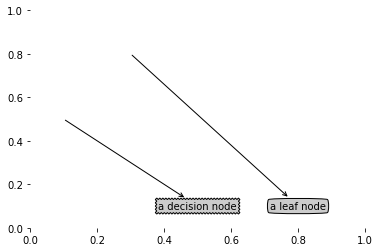

In [30]:
createPlot()

In [40]:
def getNumLeafs(myTree):
    numLeafs = 0
    #get list of keys in myTree : [*myTree]
    firstStr = [*myTree][0]
    secondDict = myTree[firstStr]
    for key in [*secondDict]:
        #test if node is dictionary
        if type(secondDict[key]).__name__ =='dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = [*myTree][0]
    secondDict = myTree[firstStr]
    for key in [*secondDict]:
        if type(secondDict[key]).__name__ =='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

In [32]:
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
            {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}]
    return listOfTrees[i]

In [33]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [38]:
getNumLeafs(retrieveTree(0))

3

In [41]:
getTreeDepth(retrieveTree(0))

2

In [42]:
def plotMidText(cntrPt, parentPt, txtString):
    '''
    Plots text between child and parent
    '''
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)

def plotTree(myTree, parentPt, nodeTxt):
    #get the width and heiht
    numLeafs = getNumLeafs(myTree)
    getTreeDepth(myTree)
    firstStr = [*myTree][0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt) #plot child value
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD #Decrement Y offset
    for key in [*secondDict]:
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff),
                    cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
    
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

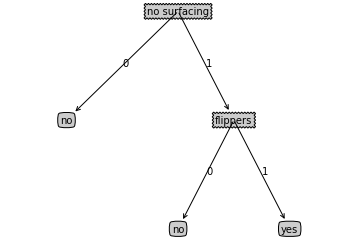

In [45]:
createPlot(retrieveTree(0))

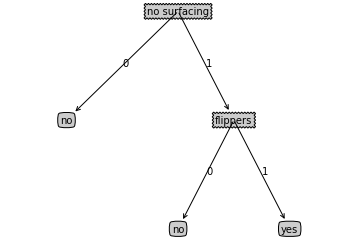

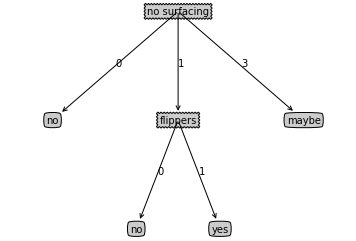

In [48]:
myTree=retrieveTree (0)
createPlot(myTree)
myTree['no surfacing'][3]='maybe'
createPlot(myTree)

In [59]:
def classify(inputTree,featLabels,testVec):
    firstStr = [*inputTree][0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in [*secondDict]:
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__=='dict':
                classLabel = classify(secondDict[key],featLabels,testVec)
            else: 
                classLabel = secondDict[key]
    return classLabel

In [60]:
myDat,labels=createDataSet()
myTree=retrieveTree (0)
classify(myTree,labels,[1,0])

'no'

In [55]:
#Use: persisting the decision tree
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename,'wb')
    pickle.dump(inputTree,fw)
    fw.close()
    
def grabTree(filename):
    import pickle
    fr = open(filename,'rb')
    return pickle.load(fr)

In [56]:
storeTree(myTree,'classifierStorage.txt')
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

In [63]:
'''
using decision trees to predict contact lens type
'''
with open(r'C:\Users\jianyuan\Desktop\Github\DataScience\MachineLearning\DecisionTree\lenses.txt') as fr:
    lenses=[inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels=['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses,lensesLabels)

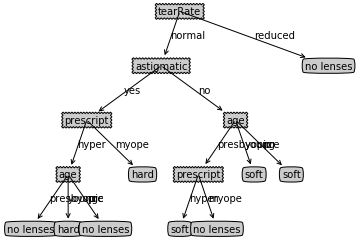

In [64]:
createPlot(lensesTree)